# General Data
1. Estimate a $y_t$ regression model for the conditional mean of $y_t$ (just, make sure that model has WN with Q test). The coefficients of this first model in principle could not be valid for all we know about (if we got GARCH they are probably not valid, but mind also be so for other kind of heteroscedasticity problem). Now, for say models that need stationary condition, note that if we really got GARCH in mean the condition of stationarity is conditional variance is not fulfilled, so our coefficients estimatioed means nothing to us.
* Note: If we were to esitmate a singular equation (just many variables with no lags of any kind), **SUPPOSING STATIONARITY FOR ALL THE VARIABLES, DEPENDEND OR INDEPENDENT INVOLVED**, like normal linear regression, we just have to check for WN and then see wheater we got heteroscedastickity with White test: The possibilites here are :
* 1. We do not have White Noise residuals (we have autocorrelated residuals)--> Directly we use HAC standard errors (does not matter the rest)
* 2. We do have White Noise residuals, but we got heteroscedasity in the White heteroscedasticity test--> We just use White heterocedasticy standard erros.
* Note 2: Now say we want to estimate an dynamic model with no lag dependent variable (NO AR PART, VERY IMPORTANT),**SUPPOSING STATIONARITY FOR ALL THE VARIABLES, DEPENDEND OR INDEPENDENT INVOLVED**,  but say yes other lagging variables, say $y_t=b_0+b_1x_{1,t}+b_2x_{1,t-1}+error_t$:
* 1. The procedure is 100% the same as before, but if we WANT (otherwise JUST DONT TEST FOR ARCH), we might also test for say ARCH type heterocedasticty, and if we were to really get ARCH type hetorescedasticy we MUST estimate the model mean and variance model jointly with GARCH or ARCH model!

2. Test for ARCH type heteroscedasticity:

We say that $a_t^2$ in ARCH(q) has the same ACF as an AR(p), so for an ARCH test we might do: $a_t^2=b_0+b_1a_{t_2}^2+b_2a_{t-2}^2+...+error_t$. If we got ARCH we must reject the F test on this, oterwhise we must accept it. Generally, it is recomendable to just look at the squared residual ACF of our model to see if this is true or not!. 

Note: To distingous between ARCH and GARCH, we must just see wheater all coeffieints are positive or negative. In Arch they are postive, in GARCH not necessary.

3. We estimate GARCH(1,1), assuming $a_t$ follow some sort of normal or whaterver distribution # Generally we start with this

* 3.1 Is the residuals of the GARCH estimated model (which basically estimate jointly the mean conditional and varaince conditional models) significant? If not we must change the model.
* 3.2 Is the GARCH parameter part significant? What about the ARCH part? We might change our decision accordingly.
* 3.3 Check for serial correlation in the standarized residuals of the model squared, this basically allows us to see wheater our GARCH model exhaused the heteroscedasticity (there is no correlation in the squared of the normalzied residuals of our model), or if we might improve or even change it.
* 3.4 Add threshold to check for effects, like, regress some dummy in the variance of the form $d=0$ if $a_t$ positive and 1 otherwise. This generally will be included in the GARCH as $b_0 d a_{t-1}^2$ or soemthing similar...
* 3.5 Check for the smiling face (Good news-->(Our model underestiamte the real value, i.e., right hand side of the graph where $a_t$ positive in the x axis) vs Bad news effect. In the y axis we got how the predicted conditional variance will react to this...)
* 3.6 Change the distribution of $a_t$ if you want, like, for many outliers t_studen perhaps is better etc...
* 3.7 If you think than volatility is high, the mean of the dependant variable must be high and when volatility is low the mean of the dependant varible must be low, then perhaps test for GARCH in mean ....


GENERAL COMMENT: First find the correct GARCH model, and then look at the parameters of the mean estimated model...


# Some exercise

In [4]:
# Load data
import pandas as pd


from dataprep.eda import create_report


import dtale



all_data = pd.read_excel(r"C:\Users\zeroi\Desktop\Asignaturas\Año 3\Semestre 2\Cuantitative Macroeconomics\Fred_Data_Proyect.xlsx", sheet_name=1, index_col=0)


inflation_direct_data = all_data[["CPI_ALL_ITEMS", "M2", "M2_REAL", "M2_VELOCITY",
                                  "GDP", "GDP_REAL", "WTI_OIL_PRICE", "PERSONAL_SAVING_RATE", "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX", "DEBT_OVER_GDP", "FULL_TIME_NOMINAL_WEEKLY_WAGE"]].pct_change(fill_method=None)



inflation_direct_data.columns = inflation_direct_data.columns+"%"


inflation_direct_data = inflation_direct_data.dropna()


"""# Profiler 1
create_report(inflation_direct_data).show_browser()
# Profiler 2
d = dtale.show(inflation_direct_data)
d.open_browser()
d._url"""

'# Profiler 1\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\ncreate_report(inflation_direct_data).show_browser()\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n# Profiler 2\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nd = dtale.show(inflation_direct_data)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nd.open_browser()\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nd._url'

In [5]:
from pmdarima import model_selection
inflation = inflation_direct_data[["CPI_ALL_ITEMS%"]].dropna()
X = inflation_direct_data.loc[:,
                              inflation_direct_data.columns != "CPI_ALL_ITEMS%"].dropna()
X = X[["M2%", "M2_VELOCITY%", "GDP_REAL%", "DEBT_OVER_GDP%", "WTI_OIL_PRICE%",
       "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%", "FULL_TIME_NOMINAL_WEEKLY_WAGE%"]]

y_train, y_test = model_selection.train_test_split(inflation, train_size=0.8)
X_train, X_test = model_selection.train_test_split(X, train_size=0.8)

In [6]:
# First stationarity test for all variables (otherwise the methods described above might not be adequate):

# ADF test as seen in class
def ADF_test_extensive_version(timeseries, IC="bic", significance=0.01):
    """
    Performs Augmented Dickey-Fuller (ADF) test with additional outputs.

    Args:
        timeseries (array-like): The time series data to be tested.
        IC (str): Information criterion to use for selecting the lag order. ["bic","aic"]
        significance (float): Significance level for hypothesis testing.

    Returns:
        Analysis of unit root type

    """
    import warnings
    warnings.simplefilter('ignore', category=UserWarning)
    from arch.unitroot import ADF
    import statsmodels.tsa.arima.model as smt
    print(f"\n\nVariable: {list(timeseries.columns)} ")
    # Step 1: Perform ADF test with constant and trend
    print("Step 1: Performing ADF test with constant and trend...")
    adf = ADF(timeseries, trend="ct", method=IC)
    print("Results of Dickey-Fuller Test:")
    print(f"       p-value of the test: {adf.pvalue}.")
    if adf.pvalue < significance:
        print(
            "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
        p_value_trend = model_0.pvalues["drift"]
        model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
        p_value_trend_sq = model_1.pvalues["trend.2"]
        print("              p-value linear trend component (WN model):", p_value_trend)
        print("              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

        if p_value_trend or p_value_trend_sq < significance:
            print(
                "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
        else:
            print(
                "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")

    else:
        print("       We do not reject the null hypothesis -> Proceeding to step 2...")
        # Step 2: Test for the significance of the trend given no unit root
        print("Step 2: Testing for the significance of the trend given unit root...")
        model_2 = smt.ARIMA(endog=timeseries.diff(),
                            order=(adf.lags, 0, 0), trend="ct").fit(cov_type="robust")
        p_value_trend = model_2.pvalues["x1"]
        print("Results of the contrast:")
        print(f"       p-value of the contrast: {p_value_trend}")
        if p_value_trend < significance:
            print(
                "       Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and t][Trend Stationary: y_t=alpha+beta*t+y_{t-1}+epsilon_t]")
            print(adf.regression.summary())
            print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
        else:
            print(
                "       We do not reject the null hypothesis -> Proceeding to step 3...")
            # Step 3: Perform ADF test with only a constant
            print("Step 3: Performing ADF test with only a constant...")
            print("Results of Dickey-Fuller Test:")
            adf = ADF(timeseries, method=IC, trend="c")
            print(f"       p-value of the test: {adf.pvalue}.")
            if adf.pvalue < significance:
                print(
                    "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
                model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                p_value_trend = model_0.pvalues["drift"]
                model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                    order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
                p_value_trend_sq = model_1.pvalues["trend.2"]
                print(
                    "              p-value linear trend component (WN model):", p_value_trend)
                print(
                    "              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

                if p_value_trend or p_value_trend_sq < significance:
                    print(
                        "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
                else:
                    print(
                        "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")

            else:
                print(
                    "       Can't reject the null hypothesis -> Proceeding to step 4...")
                # Step 4: Test for the significance of the constant given no unit root and no trend
                print(
                    "Step 4: Testing for the significance of the constant given unit root and no trend...")
                model_3 = smt.ARIMA(endog=timeseries.diff(),
                                    order=(adf.lags, 0, 0), trend="c").fit(cov_type="robust")
                p_value_const = model_3.pvalues["const"]
                print("Results of the contrast:")
                print(f"       p-value of the contrast: {p_value_const}")
                if p_value_const < significance:
                    print(
                        "         Conclusion: We reject the null hypothesis -> Might try again to see whether the unit root is significant, but with a normal distribution (see below output) -> [Model: Unit Root with c and no t][White Noise with Drift: y_t= alpha + y_{t-1} + epsilon_t]")
                    print(adf.regression.summary())
                    print("Info: These p-values are computed over the normal distribution. Errors are WN. Look at Level.L1 significance to determine whether there is a Unit Root (null hypothesis) or not as described above.")
                else:
                    print(
                        "       We do not reject the null hypothesis -> Proceeding to step 5...")
                    # Step 5: Perform ADF test with no constant and no trend
                    print(
                        "Step 5: Performing ADF test with no constant and no trend...")
                    adf = ADF(timeseries, method=IC, trend="n")
                    print("Results of Dickey-Fuller Test:")
                    print(f"       p-value of the test: {adf.pvalue}.")
                    if adf.pvalue < significance:
                        print(
                            "       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]")
                        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                        model_0 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ct").fit(cov_type="robust")
                        p_value_trend = model_0.pvalues["drift"]
                        model_1 = smt.ARIMA(endog=timeseries.diff().dropna(),
                                            order=(adf.lags, 0, 0), exog=timeseries.shift(1).dropna(), trend="ctt").fit(cov_type="robust")
                        p_value_trend_sq = model_1.pvalues["trend.2"]
                        print(
                            "              p-value linear trend component (WN model):", p_value_trend)
                        print(
                            "              p-value linear cuadratic trend component (WN model):", p_value_trend_sq)

                        if p_value_trend or p_value_trend_sq < significance:
                            print(
                                "          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]")
                        else:
                            print(
                                "          Conclusion: No evidence of the series having any unit root or trend component -> [The series is stationary]")
                    else:
                        print(
                            "       Conclusion: We do not reject the null hypothesis ->[The model has a unit root with no constant or trend]=[Pure White Noise: y_t= y_{t-1} + epsilon_t].")


ADF_test_extensive_version(y_train)
for col in X_train.columns:
    ADF_test_extensive_version(X_train[[col]])



Variable: ['CPI_ALL_ITEMS%'] 
Step 1: Performing ADF test with constant and trend...
Results of Dickey-Fuller Test:
       p-value of the test: 4.065324902070753e-09.
       We reject the null hypothesis -> [The series has no unit root, probably is stationary, though it might still have trend]
              p-value linear trend component (WN model): 0.018734804205002332
              p-value linear cuadratic trend component (WN model): 0.9731866495300667
          Conclusion: The series might have no unit root, but might have a linear or cuadratic trend component-> [Correct the model for this is recomendable (either detrend, differentiate or add in the SARIMAX model the corresponding trend component, there you just look to see if the corresponding trend is significant or not)]


Variable: ['M2%'] 
Step 1: Performing ADF test with constant and trend...
Results of Dickey-Fuller Test:
       p-value of the test: 6.572618536326306e-06.
       We reject the null hypothesis -> [The series 

In [7]:
# Pick order of ARDL selection via algortihm
from statsmodels.tsa.ardl import ardl_select_order, ARDL
# Think about this stuff, with glob=False we already got maxlag*maxorder**k, where k is the number of exogenous variables we got to use.... In our case, this is maxlag*maxorder^10. So if maxorder is anything bigger than 3 we are into millions of models!
# Now, if glob=True, the number of models are 2**(maxlag+k*maxorder), or in our case 2**(maxlag+10*maxorder), which is insane in size!
ardl_selection = ardl_select_order(endog=y_train,
                                   maxlag=0,
                                   exog=X_train,
                                   maxorder=2,
                                   trend="c",
                                   # fiexd= # Additional variables not lagged
                                   ic="bic",
                                   # Consider all posible submodels... If True might be to much
                                   glob=False,
                                   seasonal=False  # Wheater to include seasonal dummy
                                   # period = 3 # This only usable if you got seasonal True
                                   )

In [8]:
# The selected model:
import matplotlib.pyplot as plt
model_selected = ardl_selection.model.fit()
# Trend not significant, so let's take it down!
model_updated = ARDL(endog=y_train,
                     lags=0,
                     exog=X_train,
                     order={"M2%": [0], "M2_VELOCITY%": [0], "GDP_REAL%": [0], "WTI_OIL_PRICE%": [0, 1]}).fit()
print(model_selected.summary())
print(model_updated.summary())

                               ARDL Model Results                              
Dep. Variable:          CPI_ALL_ITEMS%   No. Observations:                   80
Model:             ARDL(0, 0, 0, 0, 1)   Log Likelihood                 350.949
Method:                Conditional MLE   S.D. of innovations              0.003
Date:                 Sat, 30 Mar 2024   AIC                           -687.897
Time:                         06:56:21   BIC                           -671.223
Sample:                     10-01-1998   HQIC                          -681.212
                          - 04-01-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004      0.001     -0.307      0.759      -0.003       0.002
M2%.L0                0.8111      0.169      4.801      0.000       0.474       1.148
M2_VELOCITY%.L0 

In [9]:
# Build model that uses all variables by hand
from statsmodels.tsa.stattools import q_stat
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
var_0 = ["M2%", "M2_VELOCITY%", "GDP_REAL%", "DEBT_OVER_GDP%", "WTI_OIL_PRICE%",
         "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"]
var_1 = ["M2%", "M2_VELOCITY%", "GDP_REAL%", "WTI_OIL_PRICE%",
         "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"]

var_2 = ["M2%"]
var_3 = ["GDP_REAL%"]
var_4 = ["M2%", "GDP_REAL%", "WTI_OIL_PRICE%",
         "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"]

X_train_0 = X_train[var_1]
X_test_0 = X_test[var_1]


order_0 = [[0], [0], [0], [1], [0], [1]]
order_1 = [[0, 5], [0], [0], [0, 1], [1]]
order_4 = [[0, 5], [1], [0, 1], [1]]
order_2 = [[5]]
order_3 = [[0]]


order_var_determination = dict(zip(X_train_0.columns, order_1))


model_0 = ARDL(endog=y_train,
               lags=0,
               exog=X_train_0,
               order=order_var_determination,
               trend="c"
               ).fit(cov_type="HAC",
                     # This I think is basically how many lags has the MA in the error term!
                     cov_kwds={"maxlags": 1}
                     )

print(model_0.summary())
print("See wheater errors are WN:")
print(acorr_ljungbox(model_0.resid, lags=model_0.df_model +
      1, model_df=model_0.df_model).iloc[-1].lb_pvalue)
print("Errors not WN--> We shall use HAC, or else see for ARCH (NOT NECESSARY IN THIS CASE)")
print("ARCH heterocedasticity:")
print("p-value:", het_arch(model_0.resid, ddof=model_0.df_model)[1])
print("We do not reject the hypoteshis of No ARCH--> We have no ARCH, we must use HAC! ")

print(order_var_determination)

                                ARDL Model Results                                
Dep. Variable:             CPI_ALL_ITEMS%   No. Observations:                   80
Model:             ARDL(0, 5, 0, 0, 1, 1)   Log Likelihood                 355.596
Method:                   Conditional MLE   S.D. of innovations              0.003
Date:                    Sat, 30 Mar 2024   AIC                           -693.192
Time:                            06:56:21   BIC                           -671.754
Sample:                        10-01-1999   HQIC                          -684.597
                             - 04-01-2018                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0016      0.001      1.122      0.266      -0.001       0.004
M2%.L0         

In [10]:
# Equivalent SARIMAX model to the one above (Not quite as easy to do, does not see a point to use it...)
from statsmodels.tsa.statespace.sarimax import SARIMAX
X_train["DEBT_OVER_GDP%"] = X_train["DEBT_OVER_GDP%"].shift(1)
X_train["GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"] = X_train["GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"].shift(
    1)
X_train = X_train.dropna()
y_train = y_train.iloc[1:].dropna()
model_2 = SARIMAX(endog=y_train,
                  exog=X_train,
                  order=(0, 0, 0),
                  trend="c"
                  ).fit(cov_type="robust")
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         CPI_ALL_ITEMS%   No. Observations:                   79
Model:                        SARIMAX   Log Likelihood                 346.151
Date:                Sat, 30 Mar 2024   AIC                           -674.301
Time:                        06:56:22   BIC                           -652.976
Sample:                    10-01-1998   HQIC                          -665.758
                         - 04-01-2018                                         
Covariance Type:               robust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                            3.348e-05      0.001      0.026      0.979      -0.002       0.003
M2%                                     0.8200      0.162      5.062      0.000       0.502       1.137
M2_VELOCITY%                            0.7862      0.163      4.831      0.000       0.467       1.105
GDP_REAL%                              -0.7401      0.246     -3.007      0.003      -1.223      -0.258
DEBT_OVER_GDP%                         -0.0353      0.022     -1.579      0.114      -0.079       0.009
WTI_OIL_PRICE%                          0.0224      0.004      5.304      0.000       0.014       0.031
GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%  4.291e-05   1.61e-05      2.667      0.008    1.14e-05    7.44e-05
FULL_TIME_NOMINAL_WEEKLY_WAGE%          0.0470      0.035      1.356      0.175      -0.021       0.115
sigma2                               9.155e-06   2.57e-06      3.567      0.000    4.12e-06    1.42e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):                62.54
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.57
Prob(H) (two-sided):                  0.51   Kurtosis:                         7.21
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARDL Model Results                              
===============================================================================
Dep. Variable:          CPI_ALL_ITEMS%   No. Observations:                   80
Model:             ARDL(0, 5, 1, 1, 1)   Log Likelihood                 349.454
Method:                Conditional MLE   S.D. of innovations              0.003
Date:                 Sat, 30 Mar 2024   AIC                           -682.907
Time:                         06:59:15   BIC                           -663.851
Sample:                     10-01-1999   HQIC                          -675.267
                          - 04-01-2018                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0035      0.001      3.018      0.004       0.001       0.006
M2%.L0                                     0.1538      0.059      2.624      0.011       0.037       0.271
M2%.L5                                    -0.1356      0.040     -3.411      0.001      -0.215      -0.056
GDP_REAL%.L1                               0.1317      0.050      2.630      0.010       0.032       0.231
WTI_OIL_PRICE%.L0                          0.0296      0.004      7.055      0.000       0.021       0.038
WTI_OIL_PRICE%.L1                          0.0094      0.002      3.778      0.000       0.004       0.014
GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%.L1  7.552e-05   2.83e-05      2.670      0.009    1.91e-05       0.000
==========================================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARDL Model Results                                
==================================================================================
Dep. Variable:             CPI_ALL_ITEMS%   No. Observations:                   80
Model:             ARDL(0, 5, 0, 0, 1, 1)   Log Likelihood                 355.596
Method:                   Conditional MLE   S.D. of innovations              0.003
Date:                    Sat, 30 Mar 2024   AIC                           -693.192
Time:                            06:59:15   BIC                           -671.754
Sample:                        10-01-1999   HQIC                          -684.597
                             - 04-01-2018                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0016      0.001      1.122      0.266      -0.001       0.004
M2%.L0                                     0.7140      0.167      4.268      0.000       0.381       1.048
M2%.L5                                    -0.0954      0.044     -2.181      0.032      -0.183      -0.008
M2_VELOCITY%.L0                            0.6478      0.174      3.715      0.000       0.300       0.996
GDP_REAL%.L0                              -0.6016      0.240     -2.506      0.014      -1.080      -0.123
WTI_OIL_PRICE%.L0                          0.0250      0.004      6.104      0.000       0.017       0.033
WTI_OIL_PRICE%.L1                          0.0075      0.002      3.380      0.001       0.003       0.012
GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%.L1  6.962e-05   2.23e-05      3.117      0.003    2.51e-05       0.000
==========================================================================================================
"""

,t_value,p_value
(e_model_0)^2-(e_model_1)^2,2.675384,0.008790737964807172


 It appears that there is evidence that the model 1 is better than the 0...


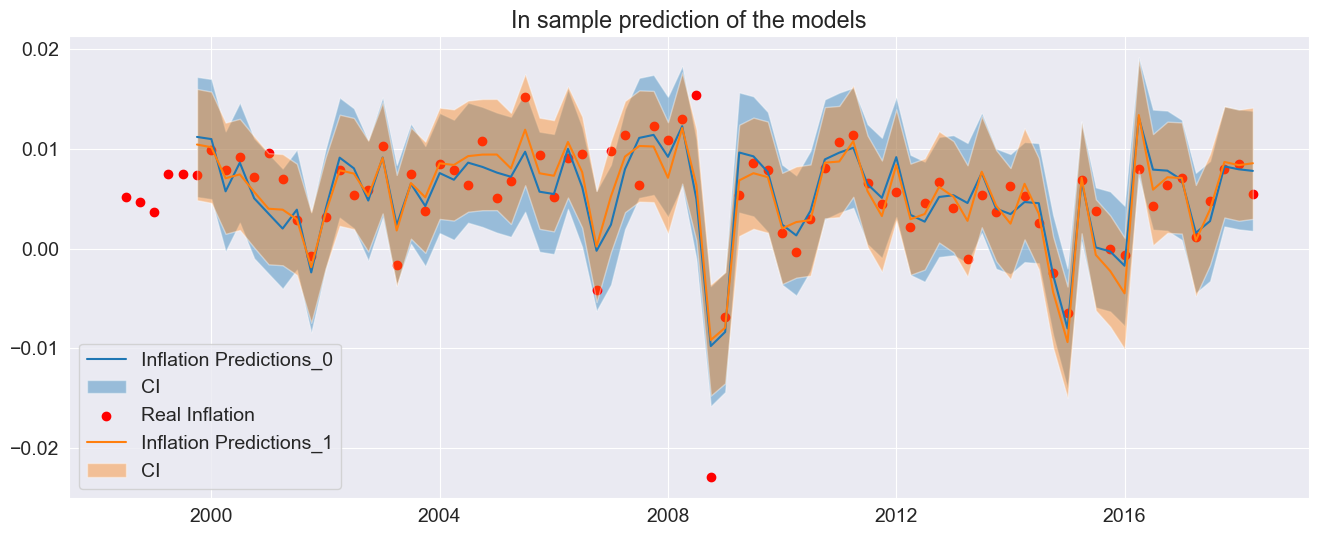

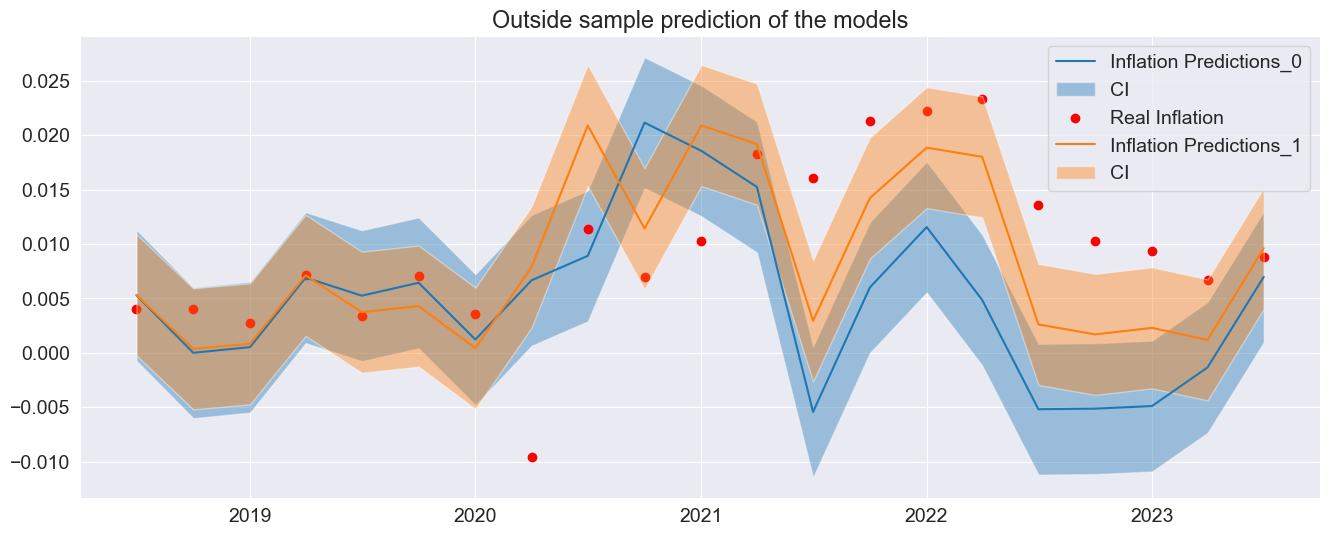

In [17]:
# Interesting Models
from pmdarima import model_selection
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)
# Model 1
inflation = inflation_direct_data[["CPI_ALL_ITEMS%"]].dropna()
X = inflation_direct_data.loc[:,
                              inflation_direct_data.columns != "CPI_ALL_ITEMS%"].dropna()
X = X[["M2%", "M2_VELOCITY%", "GDP_REAL%", "DEBT_OVER_GDP%", "WTI_OIL_PRICE%",
       "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%", "FULL_TIME_NOMINAL_WEEKLY_WAGE%"]]

y_train, y_test = model_selection.train_test_split(inflation, train_size=0.8)
X_train, X_test = model_selection.train_test_split(X, train_size=0.8)


var_model_0 = ["M2%", "GDP_REAL%", "WTI_OIL_PRICE%",
               "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"]
X_train_0 = X_train[var_model_0]
X_test_0 = X_test[var_model_0]
order_model_0 = {'M2%': [0, 5], 'GDP_REAL%': [1], 'WTI_OIL_PRICE%': [
    0, 1], 'GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%': [1]}

model_0 = ARDL(endog=y_train,
               lags=0,
               exog=X_train_0,
               order=order_model_0,
               trend="c"
               ).fit(cov_type="HAC",
                     # This I think is basically how many lags has the MA in the error term!
                     cov_kwds={"maxlags": 1}
                     )

display(model_0.summary())


# Model 2
var_model_1 = ["M2%", "M2_VELOCITY%", "GDP_REAL%", "WTI_OIL_PRICE%",
               "GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%"]

X_train_1 = X_train[var_model_1]
X_test_1 = X_test[var_model_1]
order_model_1 = {'M2%': [0, 5], 'M2_VELOCITY%': [0], 'GDP_REAL%': [
    0], 'WTI_OIL_PRICE%': [0, 1], 'GLOBAL_SUPPLY_CHAIN_PRESSURE_INDEX%': [1]}


model_1 = ARDL(endog=y_train,
               lags=0,
               exog=X_train_1,
               order=order_model_1,
               trend="c"
               ).fit(cov_type="HAC",
                     # This I think is basically how many lags has the MA in the error term!
                     cov_kwds={"maxlags": 1}
                     )
display(model_1.summary())


# fig, ax = plt.subplots(2, 1)

# In sample prediction

def insample_predictions_plot(model_1, significancy=0.05):
    get_predictions = model_1.get_prediction()
    insample_predictions = get_predictions.predicted_mean
    insample_ci = get_predictions.conf_int(significancy)
    plt.plot(y_train.index, insample_predictions,
             label=f"Inflation Predictions_0")
    plt.fill_between(
        y_train.index, insample_ci.iloc[:, 0], insample_ci.iloc[:, 1], alpha=0.4, label="CI")
    plt.scatter(y_train.index, y_train, color="r", label="Real Inflation")
    plt.legend()


insample_predictions_plot(model_0)


def insample_predictions_plot(model_1, significancy=0.05):
    get_predictions = model_1.get_prediction()
    insample_predictions = get_predictions.predicted_mean
    insample_ci = get_predictions.conf_int(significancy)
    plt.plot(y_train.index, insample_predictions,
             label=f"Inflation Predictions_1")
    plt.fill_between(
        y_train.index, insample_ci.iloc[:, 0], insample_ci.iloc[:, 1], alpha=0.4, label="CI")
    plt.title(f"In sample prediction of the models")
    plt.legend()


insample_predictions_plot(model_1)


# Outside sample prediction
def outside_predictions_plot(model_1, X_train_1, X_test_1, significancy=0.05):
    plt.figure()
    get_predictions = model_1.get_prediction(start=list(y_test.index)[0], end=list(
        y_test.index)[-1], exog=X_train_1, exog_oos=X_test_1)
    # Not changing the names for lazy
    outside_predictions = get_predictions.predicted_mean
    outside_ci = get_predictions.conf_int(significancy)
    plt.plot(y_test.index, outside_predictions,
             label=f"Inflation Predictions_0")
    plt.fill_between(
        y_test.index, outside_ci.iloc[:, 0], outside_ci.iloc[:, 1], alpha=0.4, label="CI")
    plt.scatter(y_test.index, y_test, color="r", label="Real Inflation")
    plt.legend()


outside_predictions_plot(model_0, X_train_0, X_test_0)


def outside_predictions_plot(model_1, X_train_1, X_test_1, significancy=0.05):
    get_predictions = model_1.get_prediction(start=list(y_test.index)[0], end=list(
        y_test.index)[-1], exog=X_train_1, exog_oos=X_test_1)
    # Not changing the names for lazy
    outside_predictions = get_predictions.predicted_mean
    outside_ci = get_predictions.conf_int(significancy)
    plt.plot(y_test.index, outside_predictions,
             label=f"Inflation Predictions_1")
    plt.fill_between(
        y_test.index, outside_ci.iloc[:, 0], outside_ci.iloc[:, 1], alpha=0.4, label="CI")
    plt.title(f"Outside sample prediction of the models")
    plt.legend()


outside_predictions_plot(model_1, X_train_1, X_test_1)


# DM test to see which is the best


def dm_test(timeseries=None, power=2, **model_preds):
    """
    Perform Diebold-Mariano test for predictive accuracy comparison.

    Parameters:
    - timeseries (DataFrame): Actual time series data.
    - power (int): Power for residuals calculation.
    - **model_preds: Dictionary of model predictions.

    Returns:
    - DataFrame: Results of the Diebold-Mariano test including t-values and p-values.
    """

    import pandas as pd
    from itertools import combinations
    from statsmodels.api import OLS

    # Combine model predictions into a single DataFrame
    predictions_df = pd.concat([pd.DataFrame(pred).reset_index(
        drop=True) for pred in model_preds.values()], axis=1)
    predictions_df.columns = model_preds.keys()

    # Prepare the actual time series data
    timeseries_df = pd.DataFrame(timeseries).reset_index(drop=True)

    # Calculate squared residuals
    residuals_matrix_sq = (timeseries_df.to_numpy() - predictions_df) ** power

    # Generate combinations of model pairs for comparison
    residuals_matrix_combinations = combinations(
        residuals_matrix_sq.columns, 2)
    possible_combinations = [
        f"(e_{col1})^2-(e_{col2})^2" for col1, col2 in residuals_matrix_combinations]

    # Calculate t-values and p-values for each pair of models
    t_value_list = []
    p_value_list = []
    for pair in combinations(residuals_matrix_sq.columns, 2):
        col1, col2 = pair
        d = residuals_matrix_sq[col1] - residuals_matrix_sq[col2]
        model = OLS(endog=d, exog=pd.DataFrame({"c0": [1] * len(d)})).fit()
        p_value_list.append(model.t_test("c0=0", use_t=True).pvalue)
        t_value_list.append(model.t_test("c0=0", use_t=True).statistic[0][0])

    # Create output DataFrame with t-values and p-values indexed by model pair combinations
    output = pd.DataFrame(
        {"t_value": t_value_list, "p_value": p_value_list}, index=possible_combinations)

    return output



predictions_model_0 = model_0.get_prediction(start="1999-10-01",end=list(y_test.index)[-1], exog=X_train_0,exog_oos=X_test_0).predicted_mean
predictions_model_1 = model_1.get_prediction(start="1999-10-01",end=list(y_test.index)[-1], exog=X_train_1,exog_oos=X_test_1).predicted_mean

display(dm_test(timeseries=inflation[5:], model_0=predictions_model_0,model_1=predictions_model_1))
print(" It appears that there is evidence that the model 1 is better than the 0...")